In [3]:
import matplotlib.pyplot as plt
import matplotlib
import librosa
import librosa.display
matplotlib.use('TkAgg')
import numpy as np
import cv2
import datetime
import numpy as np

data, sampling_rate = librosa.load('test.wav', offset=0.0, duration=0.04)
plt.figure(figsize=(12, 4))
print(sampling_rate)


22050


<Figure size 864x288 with 0 Axes>

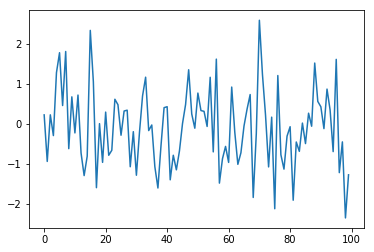

In [4]:
m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,100):
    ax.clear()
    ax.plot(matrix[i,:])
    fig.canvas.draw()

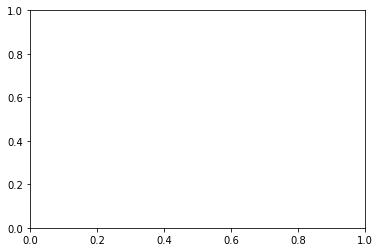

In [8]:
cap = cv2.VideoCapture('test.mp4')
total_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_time = cap.get(cv2.CAP_PROP_POS_MSEC)
base_datetime = datetime.datetime(1970, 1, 1)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()
old_frame_time = 0
frame_time = []
while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame', gray)
#     plt.imshow(gray)
#     plt.show()
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    frame_number = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
#     print(frame_number, int(cap.get(cv2.CAP_PROP_POS_MSEC)))
    frame_time.append(int(cap.get(cv2.CAP_PROP_POS_MSEC)))
cap.release()
cv2.destroyAllWindows()

In [7]:
frame_time

[33,
 66,
 100,
 133,
 166,
 200,
 233,
 266,
 300,
 333,
 367,
 400,
 433,
 467,
 500,
 533,
 567,
 600,
 633,
 667,
 700,
 734,
 767,
 800,
 834,
 867,
 900,
 934,
 967,
 1001,
 1034,
 1067,
 1101,
 1134,
 1167,
 1201,
 1234,
 1267,
 1301,
 1334,
 1368,
 1401,
 1434,
 1468,
 1501,
 1534,
 1568,
 1601,
 1634,
 1668,
 1701,
 1735,
 1768,
 1801,
 1835,
 1868,
 1901,
 1935,
 1968,
 2002,
 2035,
 2068,
 2102,
 2135,
 2168,
 2202,
 2235,
 2268,
 2302,
 2335,
 2369,
 2402,
 2435,
 2469,
 2502,
 2535,
 2569,
 2602,
 2635,
 2669,
 2702,
 2736,
 2769,
 2802,
 2836,
 2869,
 2902,
 2936,
 2969,
 3003,
 3036,
 3069,
 3103,
 3136,
 3169,
 3203,
 3236,
 3269,
 3303,
 3336,
 3370,
 3403,
 3436,
 3470,
 3503,
 3536,
 3570,
 3603,
 3636,
 3670,
 3703,
 3737,
 3770,
 3803,
 3837,
 3870,
 3903,
 3937,
 3970,
 4004,
 4037,
 4070,
 4104,
 4137,
 4170,
 4204,
 4237,
 4270,
 4304,
 4337,
 4371,
 4404,
 4437,
 4471,
 4504,
 4537,
 4571,
 4604,
 4637,
 4671,
 4704,
 4738,
 4771,
 4804,
 4838,
 4871,
 4904,
 4

ParameterError: Buffer is too short (n=0) for frame_length=1

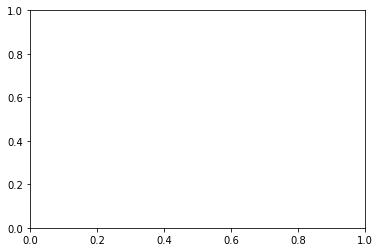

In [9]:

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()
old_frame_time = 0
for i in frame_time:
    ax.clear()
    offset = i/100
    duration = (offset - old_frame_time)/100
    old_frame_time = offset
    data, sampling_rate = librosa.load('test.wav', offset=offset, duration=duration)
    librosa.display.waveplot(data, sr=sampling_rate, offset=offset)
#     ax.plot(data)
    fig.canvas.draw()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()
old_frame_time = 0

for i in frame_time:
    ax.clear()
    offset = i/100
    duration = (offset - old_frame_time)/100
    old_frame_time = offset
    data, sampling_rate = librosa.load('test.wav', offset=offset, duration=duration)
    mfcc = librosa.feature.mfcc(data, sr=sampling_rate)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    fig.canvas.draw()
#librosa.display.waveplot(data, sr=sampling_rate)
mfcc = librosa.feature.mfcc(data, sr=sampling_rate)
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

/home/parallels/work/ml_audio/venv/lib/python3.5/site-packages/matplotlib/axis.py:1081: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


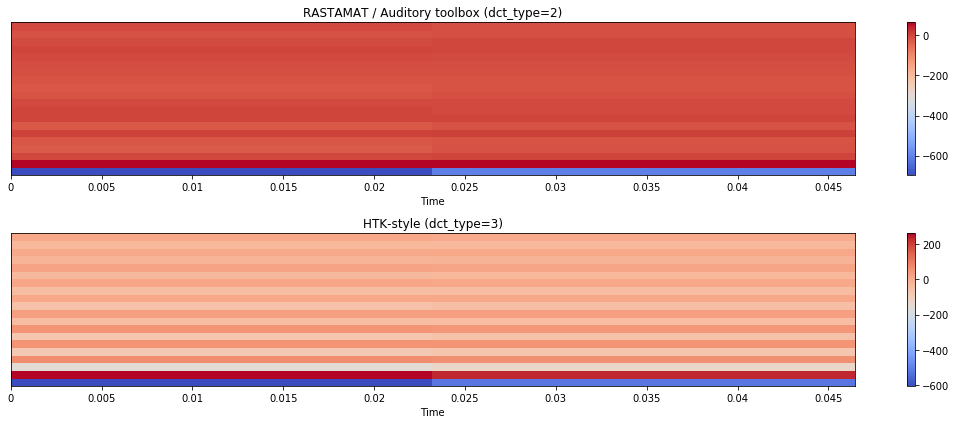

In [22]:
m_slaney = librosa.feature.mfcc(y=data, sr=sampling_rate, dct_type=2)
m_htk = librosa.feature.mfcc(y=data, sr=sampling_rate, dct_type=3)
plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(m_slaney, x_axis='time')
plt.title('RASTAMAT / Auditory toolbox (dct_type=2)')
plt.colorbar()
plt.subplot(2, 1, 2)
librosa.display.specshow(m_htk, x_axis='time')
plt.title('HTK-style (dct_type=3)')
plt.colorbar()
plt.tight_layout()

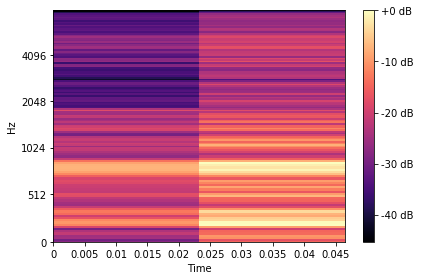

In [5]:
D = np.abs(librosa.stft(data))**2
S = librosa.feature.melspectrogram(S=D)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                        y_axis='mel', fmax=8000,
                        x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()